In [1]:
%matplotlib notebook
from pyfeti.src.utils import DomainCreator, dict2dfmap, create_selection_operator, DiskCreator 
from pyfeti.src.utils import DofManager, OrderedDict, SelectionOperator
from pyfeti.src.feti_solver import SerialFETIsolver, SolverManager, cyclic_eig
from pyfeti.src.linalg import ProjLinearSys
from pyfeti.src.cyclic import Cyclic_Constraint, Contact, Cyclic_Contact
from pyfeti.cases.case_generator import FETIcase_builder
from scipy import sparse
import amfe
import numpy as np
import matplotlib.pyplot as plt

def translator(string): 
    
    if string[0] == 'F':
        return int(string.split('_')[0][3:])
    elif string[0] == 'S':
        return int('99'.join(string.split('_')[2:4]))
    else:
        return 0


Could not load paradiso!
Could not load paradiso!
Warning! Using python in global path


In [2]:
mesh_file1 = 'meshes/simple_blisk_5_sectors_v3.inp'
m1 = amfe.Mesh()
m1.import_inp(mesh_file1)


*************************************************************

Loading Abaqus-mesh from meshes/simple_blisk_5_sectors_v3.inp
Can not read the given string list
WARNING! 2D case were selected
Mesh meshes/simple_blisk_5_sectors_v3.inp successfully imported. 
Assign a material to a physical group.
*************************************************************


In [3]:
m1.el_df

,idx_abaqus,el_type,no_of_tags,phys_group,geom_entity,no_of_mesh_partitions,partition_id,partitions_neighbors,0,1,2,3
0,1,Quad4,NaN,FAM01_ELSET,NaN,1,1,NaN,2199,2771,2204.0,2761.0
1,2,Quad4,NaN,FAM01_ELSET,NaN,1,1,NaN,2761,2204,2214.0,2760.0
2,3,Quad4,NaN,FAM01_ELSET,NaN,1,1,NaN,2760,2214,2224.0,2759.0
3,4,Quad4,NaN,FAM01_ELSET,NaN,1,1,NaN,2759,2224,2664.0,2758.0
4,5,Quad4,NaN,FAM01_ELSET,NaN,1,1,NaN,2771,2770,2205.0,2204.0
5,6,Quad4,NaN,FAM01_ELSET,NaN,1,1,NaN,2204,2205,2215.0,2214.0
6,7,Quad4,NaN,FAM01_ELSET,NaN,1,1,NaN,2214,2215,2225.0,2224.0
7,8,Quad4,NaN,FAM01_ELSET,NaN,1,1,NaN,2224,2225,2665.0,2664.0
8,9,Quad4,NaN,FAM01_ELSET,NaN,1,1,NaN,2770,2769,2206.0,2205.0
9,10,Quad4,NaN,FAM01_ELSET,NaN,1,1,NaN,2205,2206,2216.0,2215.0


In [4]:
count=1
for name in m1.get_phys_group_types():
    m1.change_tag_in_eldf('phys_group',name,translator(name))
    count+=1

In [5]:
m1.get_phys_group_types()


{1,
 2,
 3,
 4,
 5,
 11,
 12,
 13,
 14,
 15,
 101,
 102,
 105,
 111,
 201,
 202,
 203,
 212,
 302,
 303,
 304,
 313,
 403,
 404,
 405,
 414,
 501,
 504,
 505,
 515,
 1101,
 1202,
 1303,
 1404,
 1505,
 1991,
 2991,
 3991,
 4991,
 5991,
 6991,
 7991,
 8991,
 9991,
 10991}

<IPython.core.display.Javascript object>


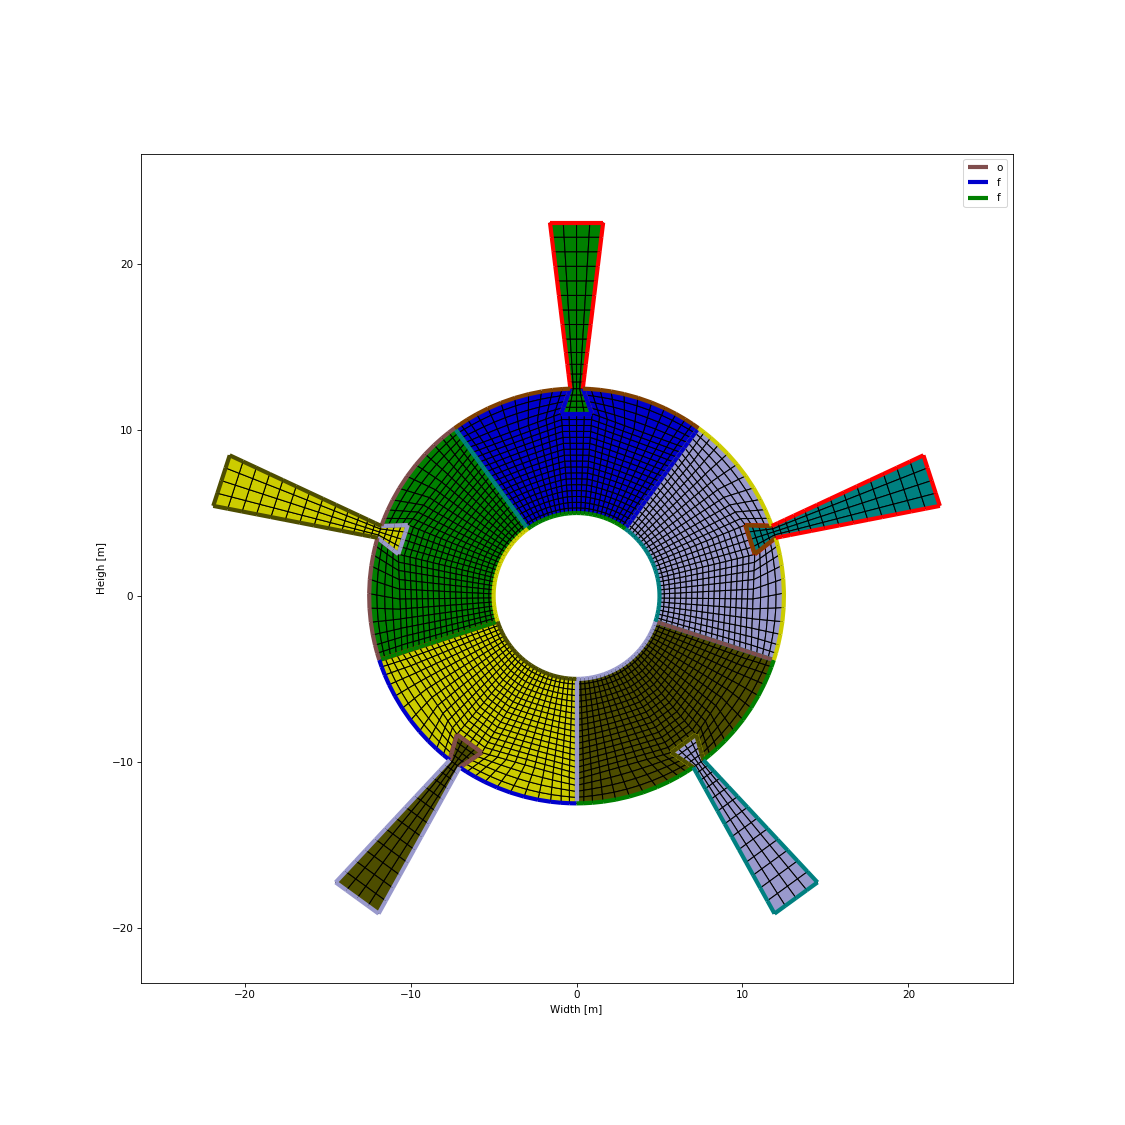

In [6]:
fig, ax1 = plt.subplots(1,1,figsize=(15,15))
amfe.plotmesh(m1,ax=ax1,color='grey')


mult=1.2
for ax in (ax1,):
    ax.set_aspect('equal')
    ax.set_xlabel('Width [m]')
    ax.set_ylabel('Heigh [m]')
plt.legend('off')

In [ ]:
# creating material
my_material = amfe.KirchhoffMaterial(E=210.0E9, nu=0.3, rho=7.86E3, plane_stress=True, thickness=1.0)



domain_id_list=[1,2,3,4,5,11,12,13,14,15]

K_dict = {}
M_dict = {}
count = 1
for domain_id in domain_id_list:
    my_system1 = amfe.MechanicalSystem()
    my_system1.set_mesh_obj(m1)
    my_system1.set_domain(domain_id,my_material)
    K1, _ = my_system1.assembly_class.assemble_k_and_f()
    M1 = my_system1.assembly_class.assemble_m()
    K_dict[count] = K1
    M_dict[count] = M1
    count+=1
    
    
K1 = K_dict[1]
M1 = M_dict[1]

In [ ]:
try:
    connectivity = []
    for _,item in m1.el_df.iloc[:, m1.node_idx:].iterrows():
        connectivity.append(list(item.dropna().astype(dtype='int64')))
    m1.el_df['connectivity'] = connectivity
except:
    pass
    


nnodes = len(m1.nodes)
id_matrix = np.array(range(nnodes*2)).reshape(nnodes,2)

id_dict = {}
for i in range(len(id_matrix)):
    id_dict[i] = list(id_matrix[i])
    
id_map_df = dict2dfmap(id_dict )
    
el_df = m1.el_df

In [ ]:
id_map_df 

In [ ]:
dof_manager = DofManager(el_df,id_map_df)

In [ ]:
dof_manager.get_dof_list_from_group_id(101)

In [ ]:
dof_manager.get_dof_list_from_group_id(1101)

In [7]:
sector_mesh_file = 'meshes/disk_sector.inp'
m2 = amfe.Mesh()
m2.import_inp(sector_mesh_file)

count=1
for name in m2.get_phys_group_types():
    m2.change_tag_in_eldf('phys_group',name,translator(name))
    count+=1


*************************************************************

Loading Abaqus-mesh from meshes/disk_sector.inp
Can not read the given string list
WARNING! 2D case were selected
Mesh meshes/disk_sector.inp successfully imported. 
Assign a material to a physical group.
*************************************************************


In [8]:
m2.el_df

,idx_abaqus,el_type,no_of_tags,phys_group,geom_entity,no_of_mesh_partitions,partition_id,partitions_neighbors,0,1,2,3
0,1,Quad4,NaN,1,NaN,1,1,NaN,3,575,8.0,565.0
1,2,Quad4,NaN,1,NaN,1,1,NaN,565,8,18.0,564.0
2,3,Quad4,NaN,1,NaN,1,1,NaN,564,18,28.0,563.0
3,4,Quad4,NaN,1,NaN,1,1,NaN,563,28,468.0,562.0
4,5,Quad4,NaN,1,NaN,1,1,NaN,575,574,9.0,8.0
5,6,Quad4,NaN,1,NaN,1,1,NaN,8,9,19.0,18.0
6,7,Quad4,NaN,1,NaN,1,1,NaN,18,19,29.0,28.0
7,8,Quad4,NaN,1,NaN,1,1,NaN,28,29,469.0,468.0
8,9,Quad4,NaN,1,NaN,1,1,NaN,574,573,10.0,9.0
9,10,Quad4,NaN,1,NaN,1,1,NaN,9,10,20.0,19.0


<IPython.core.display.Javascript object>


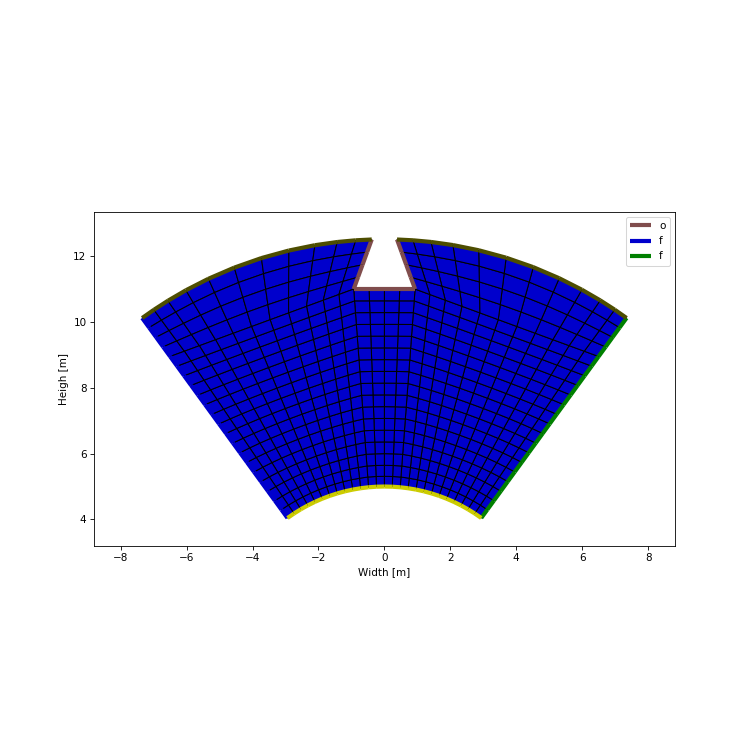

In [9]:
fig, ax1 = plt.subplots(1,1,figsize=(10,10))
amfe.plotmesh(m2,ax=ax1,color='grey')

mult=1.2
for ax in (ax1,):
    ax.set_aspect('equal')
    ax.set_xlabel('Width [m]')
    ax.set_ylabel('Heigh [m]')
plt.legend('off')

In [10]:
disk_mesh_list = [m2.rot_z(i*360/5) for i in range(5)]

#m11 = m2.rot_z(0*360/5)
#m12 = m2.rot_z(1*360/5)
#m13 = m2.rot_z(2*360/5)
#m14 = m2.rot_z(3*360/5)
#m15 = m2.rot_z(4*360/5)


<IPython.core.display.Javascript object>


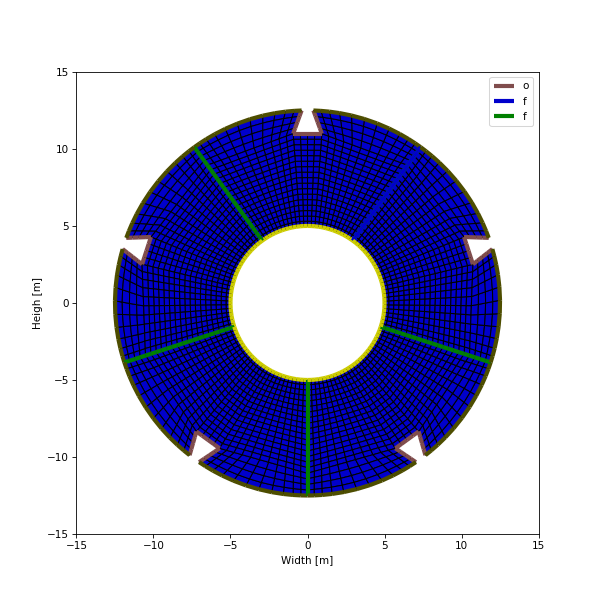

In [11]:
fig, ax2 = plt.subplots(1,1,figsize=(8,8))

for m in disk_mesh_list:
    amfe.plotmesh(m,ax=ax2,color='grey')
ax2.set_aspect('equal')
ax2.set_xlabel('Width [m]')
ax2.set_ylabel('Heigh [m]')
plt.legend('off')

In [12]:
sector_mesh_file = 'meshes/blade_sector.inp'
m3 = amfe.Mesh()
m3.import_inp(sector_mesh_file)

count=1
for name in m3.get_phys_group_types():
    m3.change_tag_in_eldf('phys_group',name,translator(name))
    count+=1

*************************************************************

Loading Abaqus-mesh from meshes/blade_sector.inp
Can not read the given string list
WARNING! 2D case were selected
Mesh meshes/blade_sector.inp successfully imported. 
Assign a material to a physical group.
*************************************************************


<IPython.core.display.Javascript object>


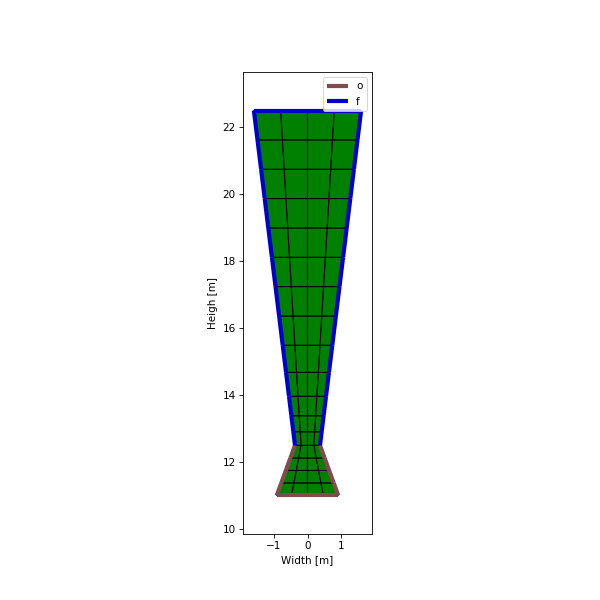

In [13]:
fig, ax1 = plt.subplots(1,1,figsize=(8,8))
amfe.plotmesh(m3,ax=ax1,color='grey')

mult=1.2
for ax in (ax1,):
    ax.set_aspect('equal')
    ax.set_xlabel('Width [m]')
    ax.set_ylabel('Heigh [m]')
plt.legend('off')

<IPython.core.display.Javascript object>


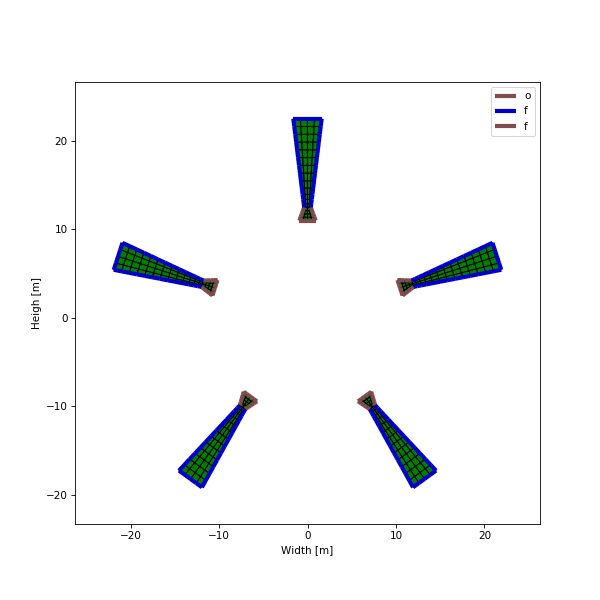

In [14]:
blade_mesh_list = [m3.rot_z(i*360/5) for i in range(5)]

fig, ax3 = plt.subplots(1,1,figsize=(8,8))

for m in blade_mesh_list:
    amfe.plotmesh(m,ax=ax3,color='grey')
ax3.set_aspect('equal')
ax3.set_xlabel('Width [m]')
ax3.set_ylabel('Heigh [m]')
plt.legend('off')


In [15]:
# creating material
my_material = amfe.KirchhoffMaterial(E=210.0E9, nu=0.3, rho=7.86E3, plane_stress=True, thickness=1.0)

K_dict = {}
M_dict = {}
count = 1
for m in disk_mesh_list:
    my_system1 = amfe.MechanicalSystem()
    my_system1.set_mesh_obj(m)
    my_system1.set_domain(1,my_material)
    K1, _ = my_system1.assembly_class.assemble_k_and_f()
    M1 = my_system1.assembly_class.assemble_m()
    K_dict[count] = K1
    M_dict[count] = M1
    count+=1
    
for m in blade_mesh_list:
    my_system1 = amfe.MechanicalSystem()
    my_system1.set_mesh_obj(m)
    my_system1.set_domain(11,my_material)
    K1, _ = my_system1.assembly_class.assemble_k_and_f()
    M1 = my_system1.assembly_class.assemble_m()
    K_dict[count] = K1
    M_dict[count] = M1
    count+=1
    

Preallocating the stiffness matrix
Done preallocating stiffness matrix with 530 elements and 1164 dofs.
Time taken for preallocation: 0.01 seconds.
Preallocating the stiffness matrix
Done preallocating stiffness matrix with 530 elements and 1164 dofs.
Time taken for preallocation: 0.01 seconds.
Preallocating the stiffness matrix
Done preallocating stiffness matrix with 530 elements and 1164 dofs.
Time taken for preallocation: 0.01 seconds.
Preallocating the stiffness matrix
Done preallocating stiffness matrix with 530 elements and 1164 dofs.
Time taken for preallocation: 0.01 seconds.
Preallocating the stiffness matrix
Done preallocating stiffness matrix with 530 elements and 1164 dofs.
Time taken for preallocation: 0.01 seconds.
Preallocating the stiffness matrix
Done preallocating stiffness matrix with 68 elements and 180 dofs.
Time taken for preallocation: 0.00 seconds.
Preallocating the stiffness matrix
Done preallocating stiffness matrix with 68 elements and 180 dofs.
Time taken f

In [16]:
try:
    connectivity = []
    for _,item in m2.el_df.iloc[:, m2.node_idx:].iterrows():
        connectivity.append(list(item.dropna().astype(dtype='int64')))
    m2.el_df['connectivity'] = connectivity
except:
    pass

nnodes = len(m2.nodes)
id_matrix = np.array(range(nnodes*2)).reshape(nnodes,2)

id_dict = {}
for i in range(len(id_matrix)):
    id_dict[i] = list(id_matrix[i])
    
id_map_df = dict2dfmap(id_dict )
    
el_df = m2.el_df

In [17]:
try:
    connectivity = []
    for _,item in m3.el_df.iloc[:, m3.node_idx:].iterrows():
        connectivity.append(list(item.dropna().astype(dtype='int64')))
    m3.el_df['connectivity'] = connectivity
except:
    pass

nnodes = len(m3.nodes)
id_matrix = np.array(range(nnodes*2)).reshape(nnodes,2)

id_dict3 = {}
for i in range(len(id_matrix)):
    id_dict3[i] = list(id_matrix[i])
    
id_map_df3 = dict2dfmap(id_dict3 )
    
el_df3 = m3.el_df

In [18]:
dof_manager = DofManager(el_df,id_map_df)

In [19]:
dof_manager3 = DofManager(el_df3,id_map_df3)

In [20]:
master_nodes = dof_manager.get_node_list_from_group_id(102)
master_nodes

array([  3,   4, 546, 546, 547, 547, 548, 548, 549, 549, 550, 550, 551,
       551, 552, 552, 553, 553, 554, 554, 555, 555, 556, 556, 557, 557,
       558, 558, 559, 559, 560, 560, 561, 561, 562, 562, 563, 563, 564,
       564, 565, 565])

In [21]:
slave_nodes = dof_manager.get_node_list_from_group_id(105)
slave_nodes

array([  5,   6, 501, 501, 502, 502, 503, 503, 504, 504, 505, 505, 506,
       506, 507, 507, 508, 508, 509, 509, 510, 510, 511, 511, 512, 512,
       513, 513, 514, 514, 515, 515, 516, 516, 517, 517, 518, 518, 519,
       519, 520, 520])

In [22]:
dir_nodes = dof_manager.get_node_list_from_group_id(101)

master_nodes = list(set(master_nodes).difference(dir_nodes))

In [23]:
dir_nodes 

array([  4,   5, 521, 521, 522, 522, 523, 523, 524, 524, 525, 525, 526,
       526, 527, 527, 528, 528, 529, 529, 530, 530, 531, 531, 532, 532,
       533, 533, 534, 534, 535, 535, 536, 536, 537, 537, 538, 538, 539,
       539, 540, 540, 541, 541, 542, 542, 543, 543, 544, 544, 545, 545])

In [24]:
master_nodes

[3,
 546,
 547,
 548,
 549,
 550,
 551,
 552,
 553,
 554,
 555,
 556,
 557,
 558,
 559,
 560,
 561,
 562,
 563,
 564,
 565]

In [25]:
cyc_obj = Cyclic_Contact(master_nodes,slave_nodes,m2.nodes,sector_angle=360/5,dimension=2)
pair_dict = cyc_obj.find_node_pairs()

In [26]:
pair_dict

{3: 6,
 546: 501,
 547: 502,
 548: 503,
 549: 504,
 550: 505,
 551: 506,
 552: 507,
 553: 508,
 554: 509,
 555: 510,
 556: 511,
 557: 512,
 558: 513,
 559: 514,
 560: 515,
 561: 516,
 562: 517,
 563: 518,
 564: 519,
 565: 520}

In [27]:
left_nodes = cyc_obj.master_nodes
right_nodes = cyc_obj.slave_nodes

In [28]:
interface_node_1 = dof_manager.get_node_list_from_group_id(111)
interface_node_2 = dof_manager3.get_node_list_from_group_id(1101)
contact_obj = Contact(interface_node_1,interface_node_2,m2.nodes,nodes_coord_slave=m3.nodes)
contact_pair = contact_obj.find_node_pairs(tol_radius=4.0E-02)

In [29]:
contact_pair 

{0: 4,
 1: 3,
 2: 2,
 7: 5,
 488: 66,
 489: 67,
 490: 68,
 576: 74,
 577: 73,
 578: 72,
 579: 71,
 580: 70,
 581: 69}

In [30]:
d = {}
d[1,2] = dof_manager.get_dofs_from_node_list(left_nodes,direction='xy')
d[1,5] = dof_manager.get_dofs_from_node_list(right_nodes,direction='xy')
d[1,6] = dof_manager.get_dofs_from_node_list(interface_node_1,direction='xy')
d[1,1] = dof_manager.get_dofs_from_node_list(dir_nodes ,direction='xy')

d2 = {}
d2[6,1] = dof_manager3.get_dofs_from_node_list(interface_node_2,direction='xy')

In [31]:
s = SelectionOperator(d,id_map_df)
s2 = SelectionOperator(d2,id_map_df3)

In [32]:
dict_key = (1,5)
K1 = K_dict[1]
M1 = M_dict[1]
B = s.build_B(dict_key).A
BBT_inv = np.linalg.inv(B.dot(B.T))
P = np.eye(B.shape[1]) - B.T.dot(BBT_inv.dot(B))

obj = ProjLinearSys(K1.A,M1.A,P)
Dp = obj.getLinearOperator()

v0 = np.random.rand(K1.shape[0])
nmodes= 9
eigval_, Vp = sparse.linalg.eigsh(Dp,k=nmodes,v0=P.dot(v0))

val_wp_ = np.sort(1/eigval_)
freq_wp_ = np.sqrt(val_wp_)/(2.0*np.pi)
freq_wp_

array([ 38.43692064, 111.86121844, 120.20117686, 249.53424331,
       261.62634758, 301.64132079, 323.70153158, 347.42864699,
       363.53595768])

Preallocating the stiffness matrix
Done preallocating stiffness matrix with 530 elements and 1164 dofs.
Time taken for preallocation: 0.01 seconds.


<IPython.core.display.Javascript object>


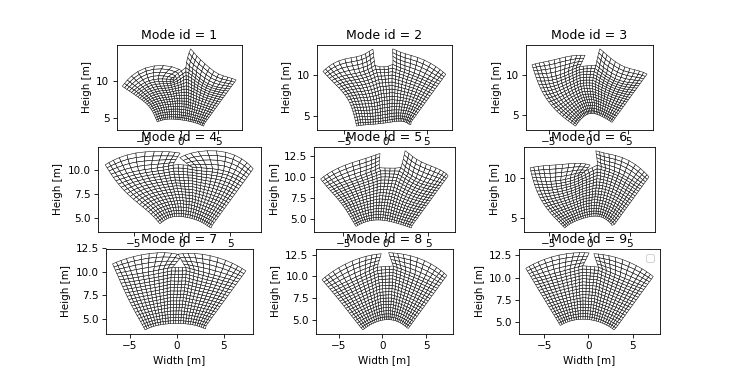

In [33]:
# creating material
my_material = amfe.KirchhoffMaterial(E=210.0E9, nu=0.3, rho=7.86E3, plane_stress=True, thickness=1.0)

my_system1 = amfe.MechanicalSystem()
my_system1.set_mesh_obj(m2)
my_system1.set_domain(1,my_material)

m = 1
my_system1.u_output = list(Vp.T)

fig1, ax1_list = plt.subplots(3,3,figsize=(10,5))

def plot2(f):
    global ax1_list
    global fig1
    counter = 0
    delta_ = 1.0
    for ax_ij in ax1_list:
        for ax2 in ax_ij:
            amfe.plot_2D_system_solution(my_system1,u_id=(nmodes - 1 - counter),ax=ax2,factor=f)
            ax2.set_aspect('equal')
            ax2.set_xlabel('Width [m]')
            ax2.set_ylabel('Heigh [m]')
            ax2.set_title('Mode id = %i' %(counter+1) )
            counter+=1
    plt.legend('off')
    
    
from matplotlib.animation import FuncAnimation, writers
import matplotlib.animation as animation

#u_list = 75*np.sin(np.linspace(0, 2.0*np.pi , 10 ))
#ani = FuncAnimation(fig1, plot2, frames= u_list, blit=True, interval=1)   
plot2(10)

In [34]:
def map_neighbors(domain_key):
    pair = []
    delta = [(0,0),(0,1),(0,-1),(0,5)]
    
    if domain_key==5:
        delta[1] = (0,-1) 
    elif domain_key==1:
        delta[2] = (0,4)
    else:
        pass
        
    for i,j in delta:
        ip,jp = domain_key+i,domain_key+j
        pair.append((ip,jp))
        
    return pair
            

In [35]:
map_neighbors(2)

[(2, 2), (2, 3), (2, 1), (2, 7)]

In [36]:
B_dict = {}
for domain_id in K_dict: 
    B_local = {}
    if domain_id<6:
        for interface_pairs, boolean_index in zip(map_neighbors(domain_id),map_neighbors(1)):
            B_local[interface_pairs] = s.build_B(boolean_index)
    else:
        B_local[(domain_id,domain_id-5)] = -1.0*s2.build_B((6,1))
        
    B_dict[domain_id] = B_local
     

In [37]:
B_dict

{1: {(1, 1): <54x1164 sparse matrix of type '<class 'numpy.int8'>'
  	with 54 stored elements in Compressed Sparse Row format>,
  (1, 2): <42x1164 sparse matrix of type '<class 'numpy.int8'>'
  	with 42 stored elements in Compressed Sparse Row format>,
  (1, 5): <42x1164 sparse matrix of type '<class 'numpy.int8'>'
  	with 42 stored elements in Compressed Sparse Row format>,
  (1, 6): <26x1164 sparse matrix of type '<class 'numpy.int8'>'
  	with 26 stored elements in Compressed Sparse Row format>},
 2: {(2, 2): <54x1164 sparse matrix of type '<class 'numpy.int8'>'
  	with 54 stored elements in Compressed Sparse Row format>,
  (2, 3): <42x1164 sparse matrix of type '<class 'numpy.int8'>'
  	with 42 stored elements in Compressed Sparse Row format>,
  (2, 1): <42x1164 sparse matrix of type '<class 'numpy.int8'>'
  	with 42 stored elements in Compressed Sparse Row format>,
  (2, 7): <26x1164 sparse matrix of type '<class 'numpy.int8'>'
  	with 26 stored elements in Compressed Sparse Row fo

In [38]:
Ks_dict = {}
Ks_dict[1] = K_dict[1]
Ks_dict[2] = K_dict[6]

Ms_dict = {}
Ms_dict[1] = M_dict[1]
Ms_dict[2] = M_dict[6]

Bs_dict = {}
Bs_dict[1] = {(1,1) : B_dict[1][1,1], (1,2) : B_dict[1][1,6] }
Bs_dict[2] = {(2,1) : B_dict[6][6,1]}


fs_dict = {1 : np.zeros(K_dict[1].shape[0]),
          2 : np.zeros(K_dict[6].shape[0])} 

K_feti_obj = SerialFETIsolver(Ks_dict,Bs_dict,fs_dict)
M_feti_obj = SerialFETIsolver(Ms_dict,Bs_dict,fs_dict)

Ks, _ = K_feti_obj.manager.assemble_global_K_and_f()
Ms, _ = M_feti_obj.manager.assemble_global_K_and_f()
B = K_feti_obj.manager.assemble_global_B()
from scipy.sparse import linalg 
BBT_inv = linalg.inv(B.dot(B.T))
Ps = np.eye(B.shape[1]) - B.T.dot(BBT_inv.dot(B))



In [39]:
obj = ProjLinearSys(Ks.A,Ms.A,Ps.A)
Dp = obj.getLinearOperator()

v0 = np.random.rand(Ks.shape[0])
nmodes= 9
eigval_, Vp = sparse.linalg.eigsh(Dp,k=nmodes,v0=Ps.A.dot(v0))

val_wp_ = np.sort(1/eigval_)
freq_wp_ = np.sqrt(val_wp_)/(2.0*np.pi)
freq_wp_

array([  5.22122928,  44.64347995,  65.21346853,  76.21437426,
       133.68635466, 155.25647171, 188.84503619, 201.22536727,
       234.74970926])

In [40]:
# creating material
my_material = amfe.KirchhoffMaterial(E=210.0E9, nu=0.3, rho=7.86E3, plane_stress=True, thickness=1.0)

my_system1 = amfe.MechanicalSystem()
my_system1.set_mesh_obj(m2)
my_system1.set_domain(1,my_material)

my_system2 = amfe.MechanicalSystem()
my_system2.set_mesh_obj(m3)
my_system2.set_domain(11,my_material)

manager = K_feti_obj.manager
v_dict = manager.vector2localdict(Vp,manager.global2local_primal_dofs)
p0 = 10.0
u1=p0*v_dict[1]
u2=p0*v_dict[2]
my_system1.u_output = list(u1.T)
my_system2.u_output = list(u2.T)

Preallocating the stiffness matrix
Done preallocating stiffness matrix with 1060 elements and 1164 dofs.
Time taken for preallocation: 0.01 seconds.
Preallocating the stiffness matrix
Done preallocating stiffness matrix with 68 elements and 180 dofs.
Time taken for preallocation: 0.00 seconds.


<IPython.core.display.Javascript object>


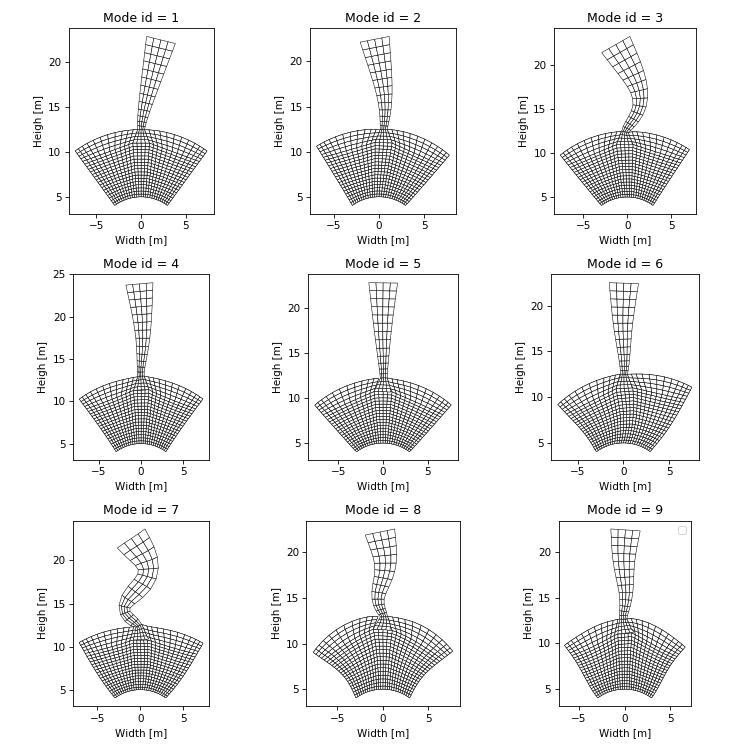

In [42]:
fig, ax1_list = plt.subplots(3,3,figsize=(10,10))
counter = 0
delta_ = 1.0
for ax_ij in ax1_list:
    for ax2 in ax_ij:
        amfe.plot_2D_system_solution(my_system1,u_id=(counter),ax=ax2)
        amfe.plot_2D_system_solution(my_system2,u_id=(counter),ax=ax2)
        ax2.set_aspect('equal')
        ax2.set_xlabel('Width [m]')
        ax2.set_ylabel('Heigh [m]')
        ax2.set_title('Mode id = %i' %(counter+1) )
        counter+=1
plt.legend('off')
plt.tight_layout()

In [43]:
f_dict = {}
for i, K in K_dict.items():
    f_dict[i] = np.zeros(K.shape[0]) 

K_feti_obj = SerialFETIsolver(K_dict,B_dict,f_dict)
M_feti_obj = SerialFETIsolver(M_dict,B_dict,f_dict)

K, _ = K_feti_obj.manager.assemble_global_K_and_f()
M, _ = M_feti_obj.manager.assemble_global_K_and_f()
B = K_feti_obj.manager.assemble_global_B()
from scipy.sparse import linalg 
BBT_inv = linalg.inv(B.dot(B.T))
P = sparse.eye(B.shape[1]) - B.T.dot(BBT_inv.dot(B))

In [44]:
P

<6720x6720 sparse matrix of type '<class 'numpy.float64'>'
	with 7004 stored elements in Compressed Sparse Row format>

In [45]:
obj = ProjLinearSys(K,M,P)
Dp = obj.getLinearOperator()

v0 = np.random.rand(K.shape[0])
nmodes= 9
eigval_, Vp = sparse.linalg.eigsh(Dp,k=nmodes,v0=P.dot(v0))

val_wp_ = np.sort(1/eigval_)
freq_wp_ = np.sqrt(val_wp_)/(2.0*np.pi)
freq_wp_

array([ 5.22394551,  5.22507219,  5.22573674,  5.22602275,  5.22693481,
       52.81605228, 58.85369696, 60.68621319, 61.16148294])

In [46]:
# creating material
my_material = amfe.KirchhoffMaterial(E=210.0E9, nu=0.3, rho=7.86E3, plane_stress=True, thickness=1.0)

sys_dict = {}

count=1
for m in disk_mesh_list:
    sys = amfe.MechanicalSystem()
    sys.set_mesh_obj(m)
    sys.set_domain(1,my_material)
    sys_dict[count] = sys
    count+=1
    
for m in blade_mesh_list:
    sys = amfe.MechanicalSystem()
    sys.set_mesh_obj(m)
    sys.set_domain(11,my_material)
    sys_dict[count] = sys
    count+=1


manager = K_feti_obj.manager
v_dict = manager.vector2localdict(Vp,manager.global2local_primal_dofs)
p0 = 10.0

for i,sys in sys_dict.items():
    u1 = v_dict[i]
    sys.u_output = list(u1.T)


Preallocating the stiffness matrix
Done preallocating stiffness matrix with 1060 elements and 1164 dofs.
Time taken for preallocation: 0.02 seconds.
Preallocating the stiffness matrix
Done preallocating stiffness matrix with 1060 elements and 1164 dofs.
Time taken for preallocation: 0.02 seconds.
Preallocating the stiffness matrix
Done preallocating stiffness matrix with 1060 elements and 1164 dofs.
Time taken for preallocation: 0.02 seconds.
Preallocating the stiffness matrix
Done preallocating stiffness matrix with 1060 elements and 1164 dofs.
Time taken for preallocation: 0.06 seconds.
Preallocating the stiffness matrix
Done preallocating stiffness matrix with 1060 elements and 1164 dofs.
Time taken for preallocation: 0.02 seconds.
Preallocating the stiffness matrix
Done preallocating stiffness matrix with 136 elements and 180 dofs.
Time taken for preallocation: 0.00 seconds.
Preallocating the stiffness matrix
Done preallocating stiffness matrix with 136 elements and 180 dofs.
Time 

<IPython.core.display.Javascript object>


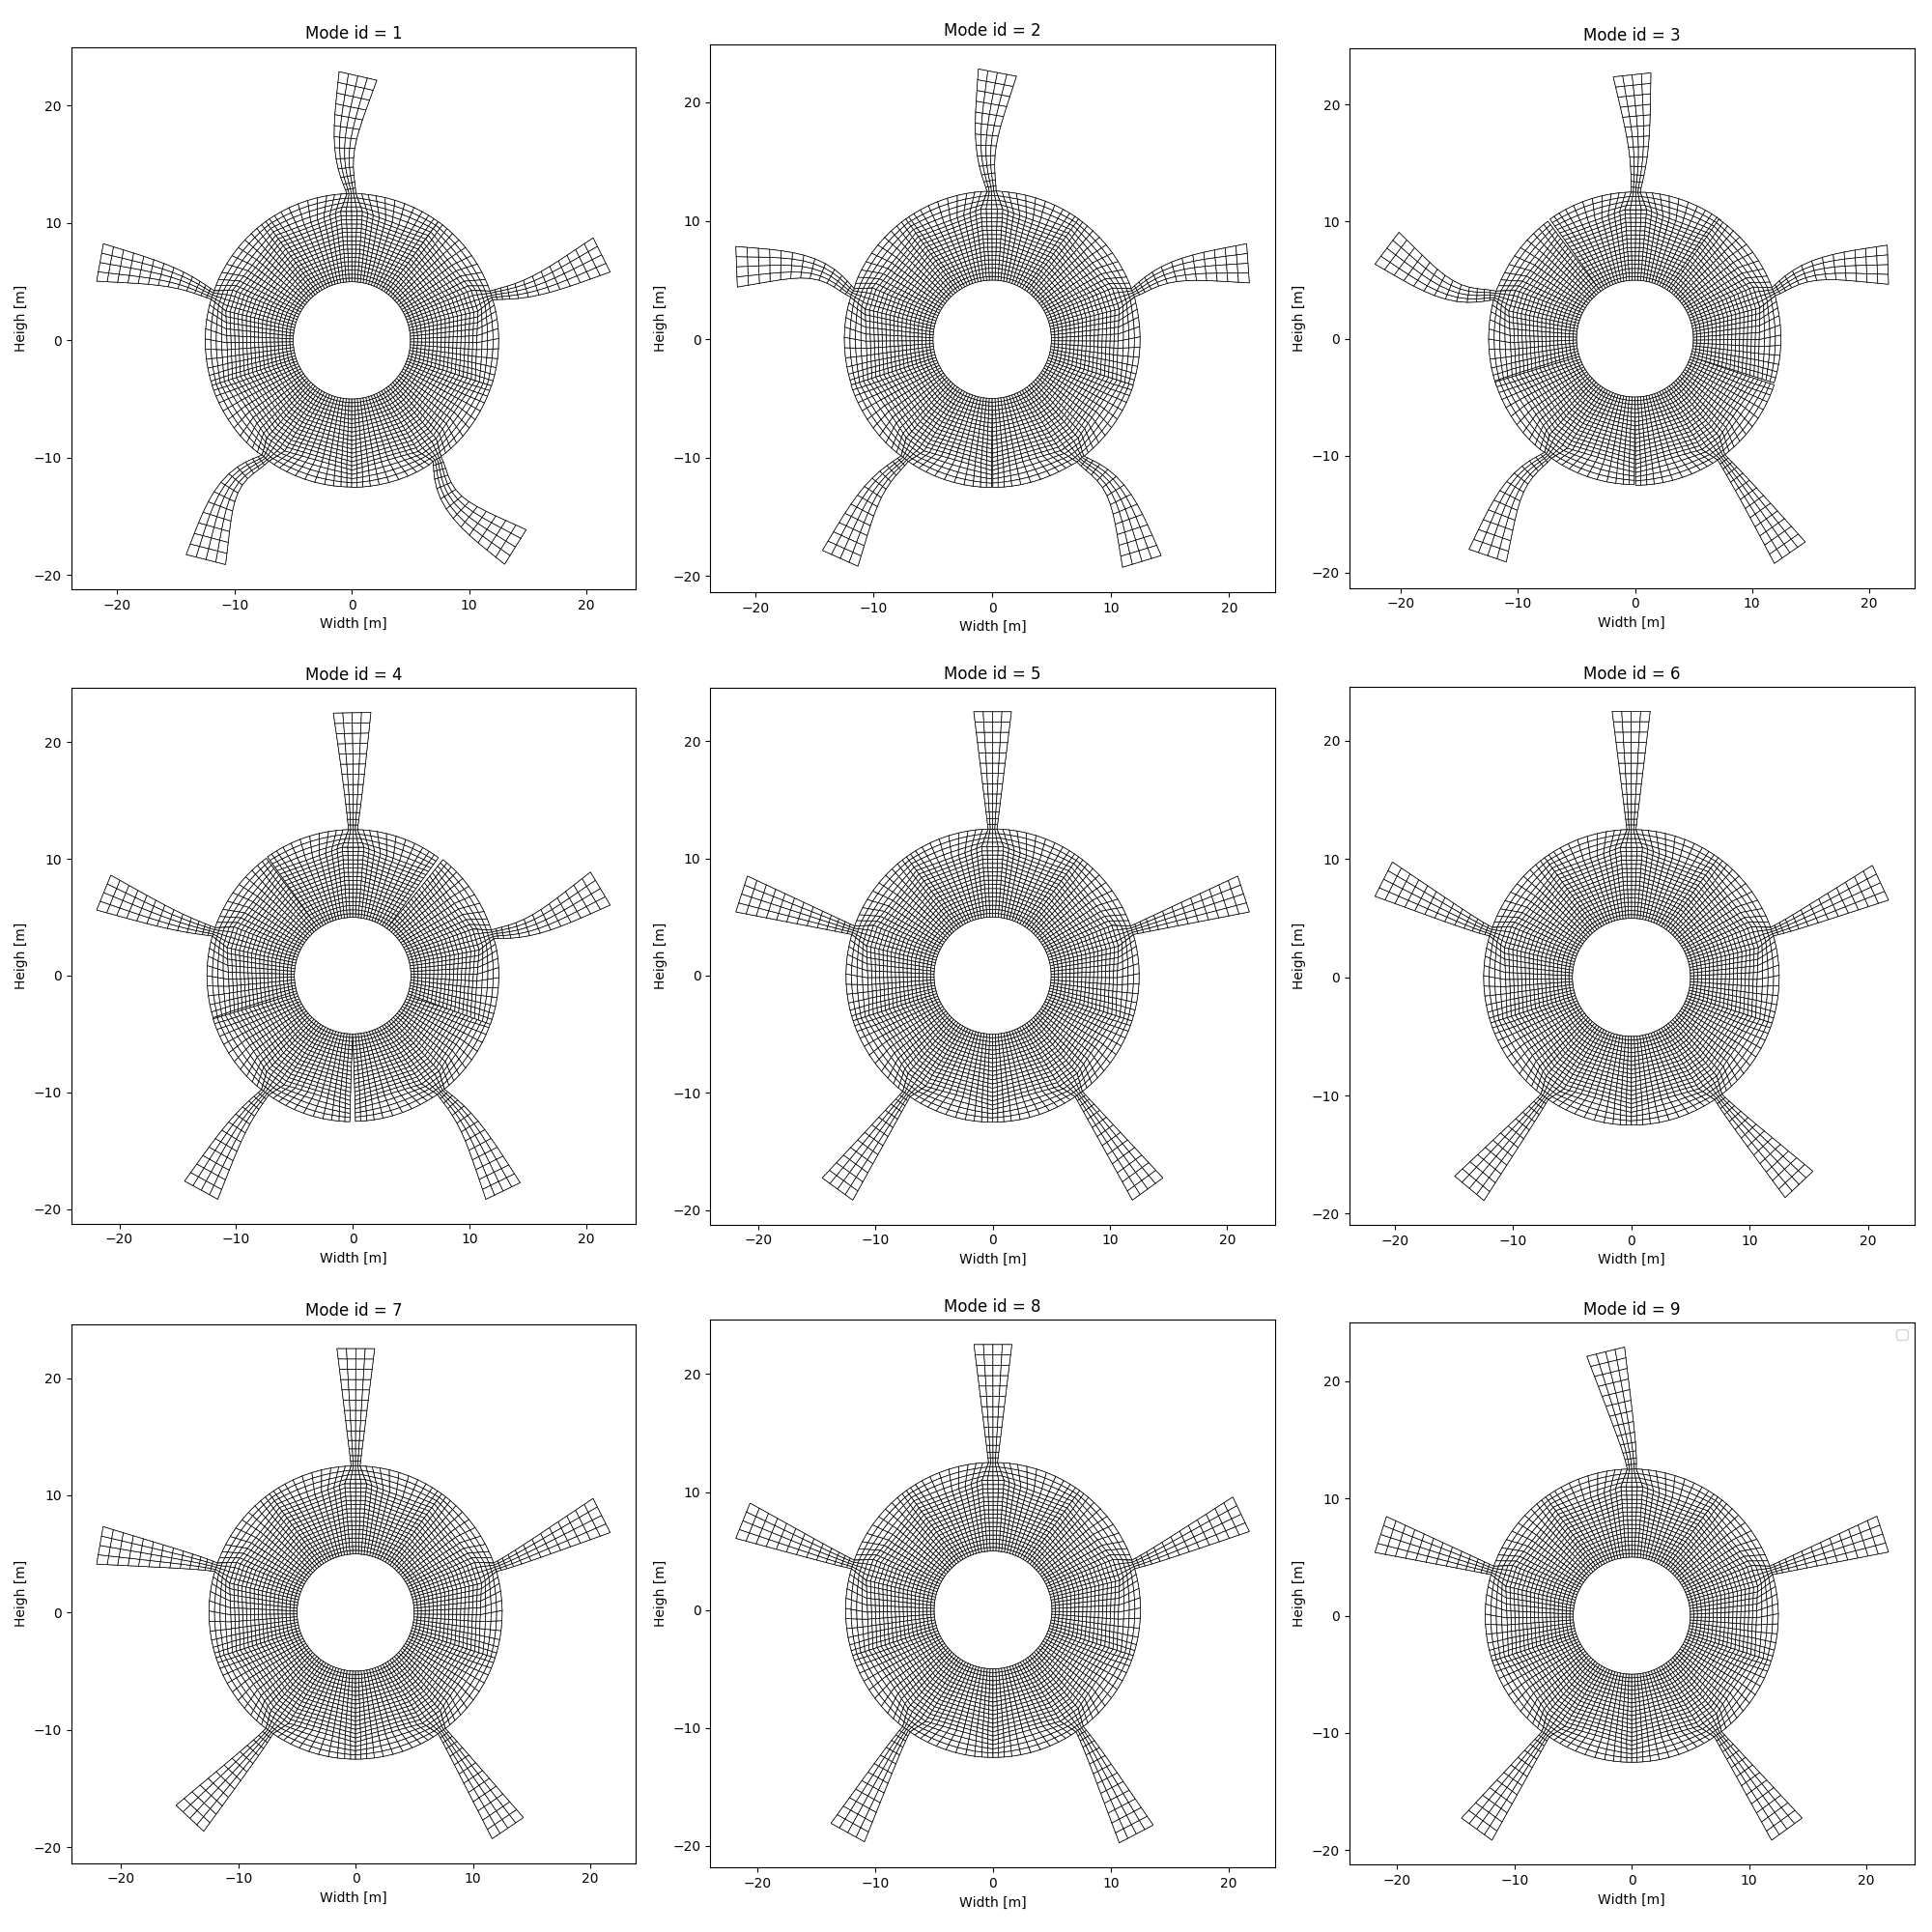

In [47]:
fig, ax1_list = plt.subplots(3,3,figsize=(20,20))
counter = 0
delta_ = 1.0
for ax_ij in ax1_list:
    for ax2 in ax_ij:
        for i,sys in sys_dict.items():
            amfe.plot_2D_system_solution(sys,u_id=(nmodes - 1 - counter),ax=ax2,factor=10)
        
        ax2.set_aspect('equal')
        ax2.set_xlabel('Width [m]')
        ax2.set_ylabel('Heigh [m]')
        ax2.set_title('Mode id = %i' %(counter+1) )
        counter+=1
plt.legend('off')
plt.tight_layout()

In [ ]:
fig.savefig('2D_blisk.png')

In [48]:
def solve_eig(K_dict,M_dict,B_dict,nmodes=10):
    f_dict = {}
    for i, K in K_dict.items():
        f_dict[i] = np.zeros(K.shape[0]) 

    K_feti_obj = SerialFETIsolver(K_dict,B_dict,f_dict)
    M_feti_obj = SerialFETIsolver(M_dict,B_dict,f_dict)

    K, _ = K_feti_obj.manager.assemble_global_K_and_f()
    M, _ = M_feti_obj.manager.assemble_global_K_and_f()
    B = K_feti_obj.manager.assemble_global_B()
    from scipy.sparse import linalg 
    #BBT_inv = linalg.inv(B.dot(B.T))
    P = sparse.eye(B.shape[1]) - 0.5*(B.T.dot(B))
    obj = ProjLinearSys(K,M,P)
    Dp = obj.getLinearOperator()

    v0 = np.random.rand(K.shape[0])
    eigval_, Vp = sparse.linalg.eigsh(Dp,k=nmodes,v0=P.dot(v0))
    print(eigval_)
    val_wp_ = np.sort(1/eigval_)
    freq_wp_ = np.sqrt(val_wp_)/(2.0*np.pi)
    return freq_wp_

In [49]:
np.random.seed(1)
nsamples = 10
ninterfaces = 5
nc = B_dict[1][1,6].shape[0]
doe = np.random.randint(2, size=(nsamples,ninterfaces,nc))

In [50]:
doe[0][2] - doe[0][1] 

array([ 0,  0,  0,  1,  1,  0,  0, -1, -1,  0,  0,  0,  1,  1,  0,  0, -1,
       -1,  0,  0,  0, -1, -1,  0,  1,  0])

In [51]:
import copy
interface_pair_list = [(1,6),(2,7),(3,8),(4,9),(5,10)]
Bp_list = []
for sample in doe:
    B_dict_ = copy.deepcopy(B_dict.copy())
    for interface_pair, pindex in zip(interface_pair_list,sample): 
        domain_i, domain_j = interface_pair
        Bij = copy.deepcopy(B_dict_[domain_i][domain_i, domain_j])
        Bji = copy.deepcopy(B_dict_[domain_j][domain_j, domain_i])
        p = sparse.diags(pindex)
        pos = np.argwhere(pindex>0).T[0]
        print(pos)
        B_dict_[domain_i][domain_i, domain_j] = Bij[pos,:]
        B_dict_[domain_j][domain_j, domain_i] = Bji[pos,:]
    Bp_list.append(B_dict_)

[ 0  1  4  5  6  7  8 11 13 14 17 21 24]
[ 2  6  7  8  9 10 14 15 16 17 18 19 21 22 25]
[ 2  3  4  6  9 10 12 13 14 15 18 19 24 25]
[ 0  2  5  6  8  9 11 14 15 16 18 19 21 22 23 24]
[ 4  5  6  7  8  9 10 17 18 19 20 21 22 25]
[ 0  3  7  8  9 10 11 13 15 19 20 21 23]
[ 2  4  6  7  8 15 18 21 22]
[ 0  5 10 11 14 15 16 22 23 24]
[ 0  1  5  6  8  9 10 12 13 14 15 17 20 22 24 25]
[ 1  2  4  5  6  8 10 12 13 14 15 16 17 20 21 25]
[ 0  6  7  8  9 10 11 12 15 19 21 23]
[ 2  3  7  9 10 13 15 19 21 23 24 25]
[ 1  3  4  5  6  9 14 15 17 18 21 22 23 24 25]
[ 0  1  9 15 16 17 18 22 24]
[ 0  7 11 13 14 17 18 20 22 24 25]
[ 2  8  9 12 13 14 15 17 19 22 24]
[ 0  5  8  9 10 11 12 16 18 19 21 22 25]
[ 0  2  3  4  5  7 13 18 21 23 24]
[ 0  2  4  9 11 12 13 14 15 17 19 24 25]
[ 4  7  8  9 10 12 13 15 18 22 23 24 25]
[ 4  6  7 10 11 13 14 19 24]
[ 0  3  4  5  8 14 15 16 17 18 21 22]
[ 1  5  7 12 15 16 18 19 20 21 22]
[ 5  9 11 13 16 17 18 19 20 21 25]
[ 2  4  5  9 10 12 13 18 21]
[ 2  3 10 11 13 16 18 19 2

In [ ]:
Bp_list[0][1][1,6]

In [ ]:
Bp_list[0][6][6,1]

In [53]:
freq_list = []
nmodes=2
for B_dict_p in Bp_list:
    freq = solve_eig(K_dict,M_dict,B_dict_p,nmodes=nmodes)
    print(freq)
    freq_list.append(freq)

[1.23722646e+13 1.52934740e+13]
[4.06974367e-08 4.52475983e-08]
[5.10347369e+12 6.99242107e+12]
[6.01875057e-08 7.04510048e-08]
[-4.84097666e+11  6.83509050e+11]
[           nan 1.92507652e-07]


/home/ge72tih/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in sqrt


[2.49237529e+11 4.79173760e+13]
[2.29918341e-08 3.18796403e-07]
[-8.63581319e+10  9.92567015e+09]
[           nan 1.59749759e-06]
[1.20632003e+12 1.19456012e+12]
[1.44906832e-07 1.45618356e-07]
[ 1.21972748e+13 -5.56085355e+13]
[           nan 4.55710178e-08]
[-8.20706871e+12  1.41745553e+10]
[           nan 1.33679684e-06]
[1.61564793e+11 2.22256450e+10]
[3.95955853e-07 1.06756160e-06]
[ 1.26050260e+11 -2.43351702e+10]
[          nan 4.4827886e-07]


In [ ]:
B = B_dict_p[1][1,6]

In [ ]:
B

In [ ]:
B = B_dict_p[6][6,1]
B

In [ ]:
pos = np.argwhere(doe[0][1]>0).T[0]
Bp = B[pos,:]

In [ ]:
Bp